In [ ]:
import os
import cv2
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm 
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path_benih = '/content/drive/My Drive/Penelitian/Dataset/'

In [ ]:
kelas = ['haploid', 'diploid']
kelas

['haploid', 'diploid']

In [ ]:
size = (224,224)
def get_data(data_dir):
    label = 0
    x = []
    y = []
    for folder in kelas:
        print("Loading {}".format(data_dir+folder))
        for pic in tqdm(glob.glob(data_dir + folder + '/*')):
            im = cv2.imread(pic)
            im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
            im = cv2.resize(im, (size))
            im = np.array(im)
            x.append(im)
            y.append(label)
        label+=1
    x = np.array(x, dtype = 'float32')
    y = np.array(y, dtype = 'int32')
    return x,y

In [ ]:
x_train, y_train = get_data(path_benih + 'train/')
x_test, y_test = get_data(path_benih + 'test/')

Loading /content/drive/My Drive/Penelitian/Dataset/train/haploid


100%|██████████| 984/984 [00:23<00:00, 41.84it/s] 


Loading /content/drive/My Drive/Penelitian/Dataset/train/diploid


100%|██████████| 1416/1416 [00:33<00:00, 42.06it/s] 


Loading /content/drive/My Drive/Penelitian/Dataset/test/haploid


100%|██████████| 246/246 [00:06<00:00, 38.69it/s]


Loading /content/drive/My Drive/Penelitian/Dataset/test/diploid


100%|██████████| 354/354 [00:07<00:00, 47.71it/s] 


In [ ]:
print(x_train[0])
print(y_train[0])

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
0.0


In [ ]:
x_train/=255.
x_test/=255.

In [ ]:
print(x_train[0])

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


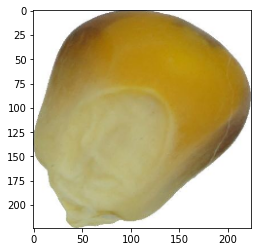

In [ ]:
plt.imshow(x_train[11])

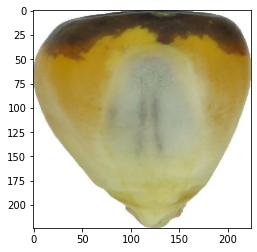

In [ ]:
plt.imshow(x_train[-11])

In [ ]:
len(x_train)+len(x_test)

3000

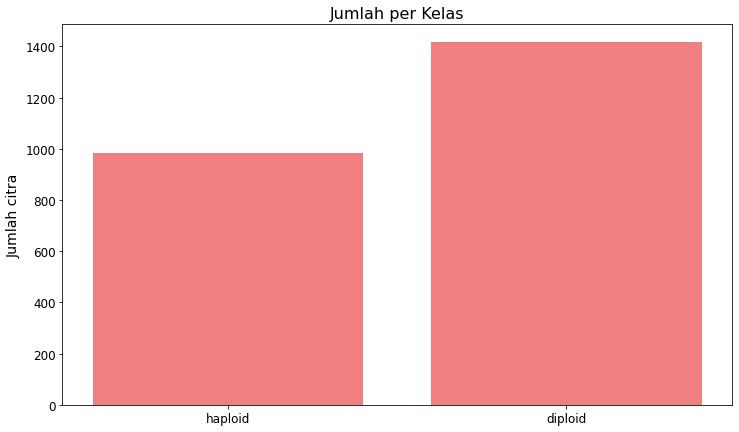

In [ ]:
labels_count = np.unique(y_train, return_counts=True)
plt.figure(figsize=(12,7))
plt.bar(kelas, labels_count[1], color='lightcoral')

plt.title('Jumlah per Kelas', size=16)
plt.ylabel('Jumlah citra', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

In [ ]:
labels_count[1]

array([ 984, 1416])

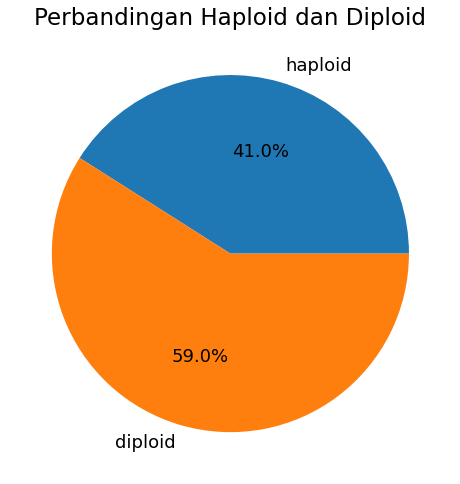

In [ ]:
plt.figure(figsize=(8,12))
plt.rcParams['font.size'] = 18
plt.pie(labels_count[1],
        labels=kelas,
        autopct='%1.1f%%')
plt.title('Perbandingan Haploid dan Diploid', size=23)
plt.show()

In [ ]:
x_train.shape

(2400, 224, 224, 3)

In [ ]:
rus = RandomUnderSampler(random_state=42)
n_sample, height, width, channel = x_train.shape

rus_x_train, rus_y_train = rus.fit_resample(
    x_train.reshape((n_sample, height*width*channel)), y_train)

In [ ]:
rus_x_train = rus_x_train.reshape((rus_x_train.shape[0], 224, 224, 3))

In [ ]:
rus_x_train.shape

(1968, 224, 224, 3)

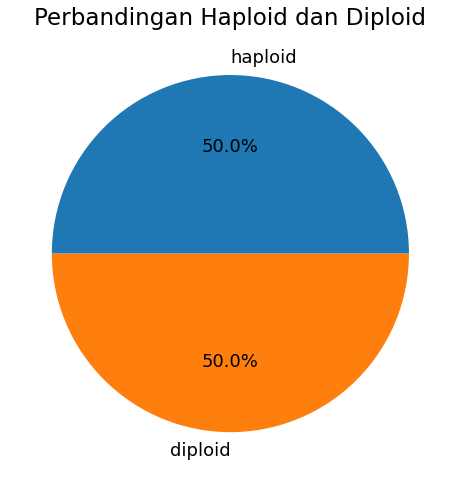

In [ ]:
labels_count_rus = np.unique(rus_y_train, return_counts=True)
plt.figure(figsize=(8,12))
plt.rcParams['font.size'] = 18
plt.pie(labels_count_rus[1],
        labels=kelas,
        autopct='%1.1f%%')
plt.title('Perbandingan Haploid dan Diploid', size=23)
plt.show()

In [ ]:
labels_count_rus[1]

array([984, 984])

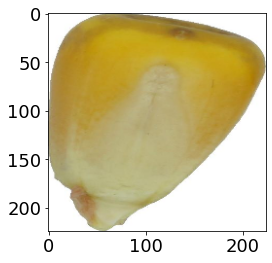

In [ ]:
plt.imshow(rus_x_train[5])

In [ ]:
print(rus_y_train[5])

0.0


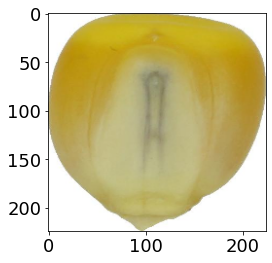

In [ ]:
plt.imshow(rus_x_train[-2])

In [ ]:
print(rus_y_train[-2])

1.0


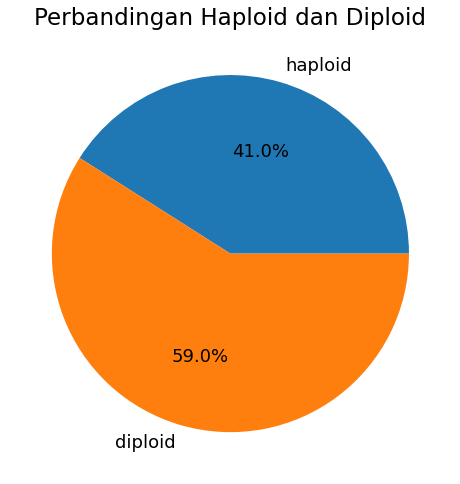

In [ ]:
labels_count = np.unique(y_test, return_counts=True)
plt.figure(figsize=(8,12))
plt.rcParams['font.size'] = 18
plt.pie(labels_count[1],
        labels=kelas,
        autopct='%1.1f%%')
plt.title('Perbandingan Haploid dan Diploid', size=23)
plt.show()

In [ ]:
labels_count[1]

array([246, 354])

In [ ]:
rus = RandomUnderSampler(random_state=42)
n_sample, height, width, channel = x_test.shape

rus_x_test, rus_y_test = rus.fit_resample(
    x_test.reshape((n_sample, height*width*channel)), y_test)

In [ ]:
rus_x_test = rus_x_test.reshape((rus_x_test.shape[0], 224, 224, 3))

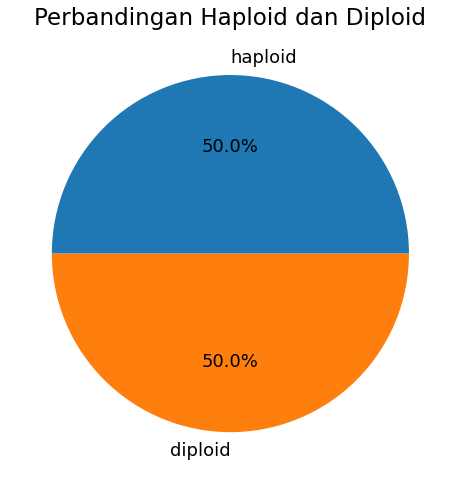

In [ ]:
labels_count_rus_test = np.unique(rus_y_test, return_counts=True)
plt.figure(figsize=(8,12))
plt.rcParams['font.size'] = 18
plt.pie(labels_count_rus_test[1],
        labels=kelas,
        autopct='%1.1f%%')
plt.title('Perbandingan Haploid dan Diploid', size=23)
plt.show()

In [ ]:
labels_count_rus_test[1]

array([246, 246])

In [ ]:
from sklearn.utils import shuffle 
rus_x_train, rus_y_train = shuffle(rus_x_train, rus_y_train, random_state=42)

In [ ]:
def display_examples(class_names, images, labels):
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

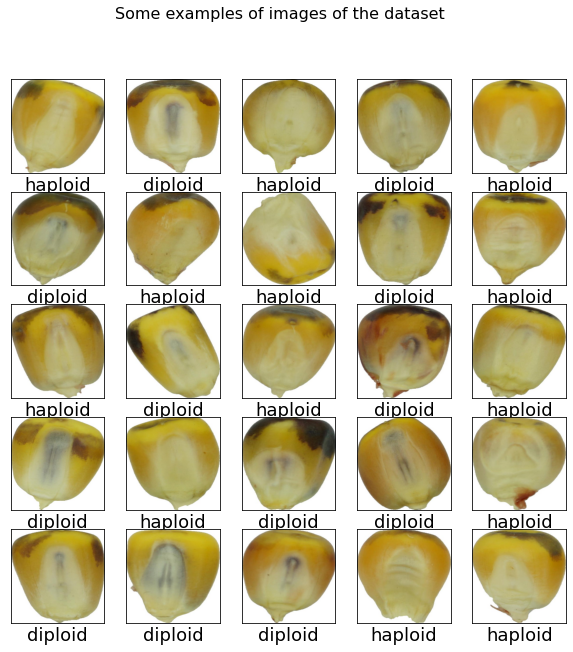

In [ ]:
display_examples(kelas, rus_x_train, rus_y_train)

In [ ]:
second = [427, 285, 433, 231]
fold = ['Percobaan-1', 'Percobaan-2', 'Percobaan-3', 'Percobaan-4']

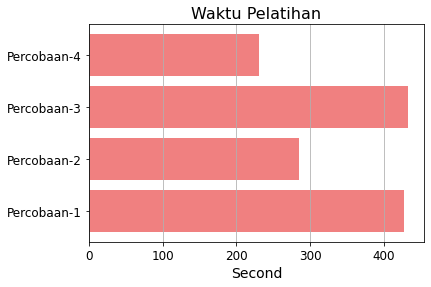

In [ ]:
plt.barh(fold,second, color='lightcoral')

plt.title('Waktu Pelatihan', size=16)
plt.xlabel('Second', size=14)
plt.grid(axis='x')
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()


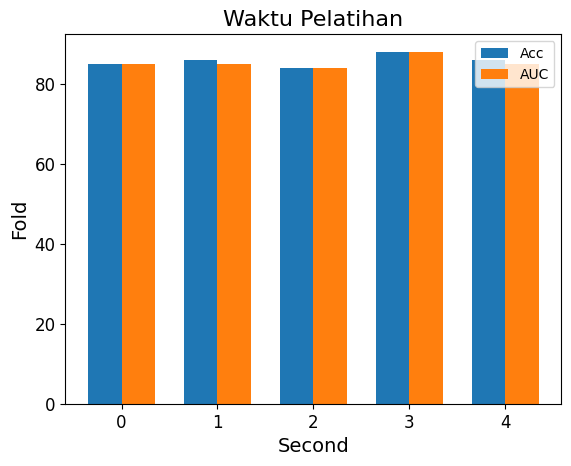

In [ ]:
acc = [85,86,84,88,86]
prec = [88,88,88,92,88]
rec = [86,88,83,88,88]
f1 = [87,88,86,90,88]
auc = [85,85,84,88,85]

x = np.arange(len(fold))
width = 0.35

a = plt.bar(x - width/2, acc, width,  label='Acc')
b = plt.bar(x + width/2, auc, width,  label='AUC')

plt.title('Waktu Pelatihan', size=16)
plt.xlabel('Second', size=14)
plt.ylabel('Fold', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend()

plt.show()


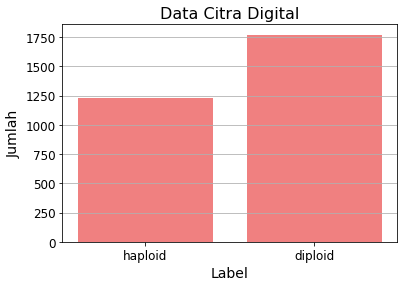

In [ ]:
kelas = ['haploid', 'diploid']
jumlah = [1230, 1770]
plt.bar(kelas,jumlah, color='lightcoral')

plt.title('Data Citra Digital', size=16)
plt.xlabel('Label', size=14)
plt.ylabel('Jumlah', size=14)
plt.grid(axis='y')
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()


In [ ]:
# P1 = 4
loss1 = [0.7395799160003662, 0.5657573938369751, 0.5003848671913147, 0.45415642857551575, 0.42662379145622253, 0.4270305335521698, 0.38966649770736694, 0.3858146369457245, 0.34668752551078796, 0.3438299596309662, 0.32527583837509155, 0.3157225251197815, 0.3213605284690857, 0.293694406747818, 0.3077705204486847, 0.29514673352241516, 0.2986111640930176, 0.2673185467720032, 0.2685924470424652, 0.26164525747299194, 0.25013431906700134, 0.23891468346118927, 0.21744142472743988, 0.24748863279819489, 0.22990697622299194]
# P2 = 5
loss2 = [0.05661427974700928, 0.0696180909872055, 0.021649139001965523, 0.0627339705824852, 0.03795711323618889, 0.054133497178554535, 0.013519872911274433, 0.021044660359621048, 0.040110837668180466, 0.03612113371491432, 0.02853797934949398, 0.0162802767008543, 0.024033237248659134, 0.013388070277869701]
# P3 = 2
loss3 = [0.755477249622345, 0.5863140225410461, 0.5149535536766052, 0.4760432243347168, 0.45517095923423767, 0.414425253868103, 0.4033159017562866, 0.380418062210083, 0.36520227789878845, 0.32923492789268494, 0.3241824507713318, 0.31267768144607544, 0.31499892473220825, 0.2895227074623108, 0.28564009070396423, 0.25833550095558167, 0.2573517858982086, 0.27414920926094055, 0.24722906947135925, 0.23778538405895233, 0.22394415736198425, 0.22592349350452423, 0.2119671106338501, 0.20028804242610931, 0.20960733294487, 0.19967341423034668, 0.17656590044498444, 0.18004678189754486, 0.18693727254867554, 0.18840304017066956, 0.15949004888534546, 0.1814548224210739, 0.16775240004062653, 0.16643431782722473]
# P4 = 5
loss4 = [0.13071757555007935, 0.08780042827129364, 0.1019865944981575, 0.06240604817867279, 0.06906819343566895, 0.11327098309993744, 0.0362420454621315, 0.01765855774283409, 0.03573700785636902, 0.045526254922151566, 0.06028217449784279, 0.04523533582687378, 0.01815761625766754, 0.01965131238102913]

print(len(loss1))
print(len(loss2))
print(len(loss3))
print(len(loss4))


25
14
34
14


In [ ]:
def visualisasi_fit(judul, y, loss1, loss2, loss3, loss4):
  fig, ax = plt.subplots(constrained_layout=True, figsize=(9,6))
  ax.set_title(judul, size=16)
  ax.set_xlabel('Epochs', size=14)
  ax.set_ylabel(y, size=14)
  ax.plot(loss1, label='loss-1')
  ax.plot(loss2, label='loss-2')
  ax.plot(loss3, label='loss-3')
  ax.plot(loss4, label='loss-4')
  
  ax.grid()
  ax.set_ylim((0., 1))
  ax.set_xlim((0, 35))
  ax.legend()

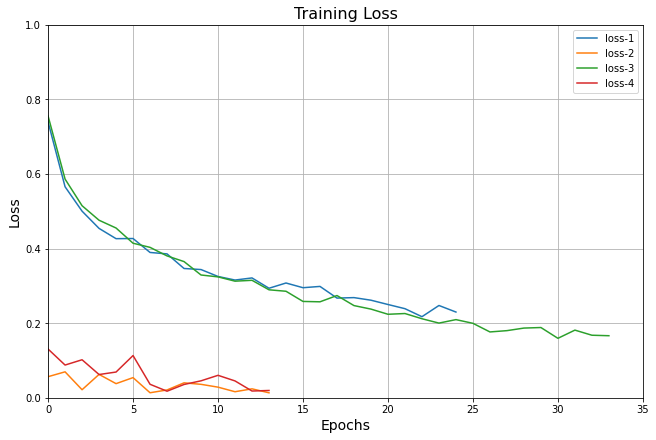

In [ ]:
vis_loss = visualisasi_fit('Training Loss', 'Loss', loss1, loss2, loss3, loss4)
vis_loss

In [ ]:
# P1 = 4
val_loss1 = [0.5319743752479553, 0.48891130089759827, 0.4367820620536804, 0.41608038544654846, 0.4445108473300934, 0.394955575466156, 0.3936944901943207, 0.36127805709838867, 0.3667045533657074, 0.3414018750190735, 0.3401753008365631, 0.34812965989112854, 0.3349381387233734, 0.38952967524528503, 0.37330761551856995, 0.3731642961502075, 0.3779796361923218, 0.3317474126815796, 0.3426216244697571, 0.33632707595825195, 0.33663424849510193, 0.3366941809654236, 0.3644912838935852, 0.34385815262794495, 0.3498261272907257]
# P2 = 5
val_loss2 = [0.04856034740805626, 0.02988417074084282, 0.06273411959409714, 0.0796145424246788, 0.041220035403966904, 0.03873565420508385, 0.021691305562853813, 0.07482852786779404, 0.06098506227135658, 0.05427214875817299, 0.025529367849230766, 0.026978861540555954, 0.08148205280303955, 0.045435428619384766]
# P3 = 2
val_loss3 = [0.6013042330741882, 0.5650233030319214, 0.5014011859893799, 0.46158525347709656, 0.43781644105911255, 0.45598965883255005, 0.4010462164878845, 0.40924909710884094, 0.385158509016037, 0.39829644560813904, 0.38919490575790405, 0.36100488901138306, 0.36008721590042114, 0.3422732353210449, 0.3577166199684143, 0.36053118109703064, 0.34063294529914856, 0.4086367189884186, 0.33055827021598816, 0.35840025544166565, 0.3222156763076782, 0.4047676920890808, 0.3415585458278656, 0.43134182691574097, 0.3401634097099304, 0.3345978260040283, 0.3158835172653198, 0.3457848131656647, 0.3257673978805542, 0.3340725898742676, 0.39889049530029297, 0.3498283326625824, 0.34471645951271057, 0.36715346574783325]
# P4 = 5
val_loss4 = [0.13716594874858856, 0.11414416879415512, 0.13359040021896362, 0.0778694897890091, 0.5823951959609985, 0.08360857516527176, 0.07144008576869965, 0.07421834021806717, 0.07684066891670227, 0.14164870977401733, 0.17436425387859344, 0.08297277987003326, 0.16733162105083466, 0.10549701750278473]

print(len(val_loss1))
print(len(val_loss2))
print(len(val_loss3))
print(len(val_loss4))


25
14
34
14


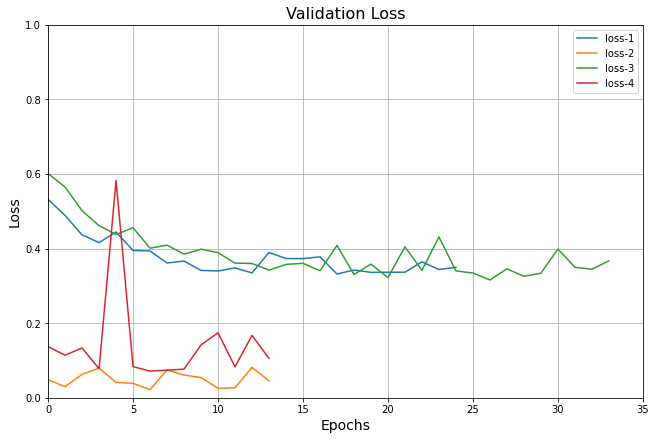

In [ ]:
vis_val_loss = visualisasi_fit('Validation Loss', 'Loss', val_loss1, val_loss2, val_loss3, val_loss4)
vis_val_loss

In [ ]:
# P1 = 4
akurasi1 = [0.6343749761581421, 0.7203124761581421, 0.7567708492279053, 0.7947916388511658, 0.807812511920929, 0.8020833134651184, 0.8203125, 0.8385416865348816, 0.8453124761581421, 0.854687511920929, 0.8630208373069763, 0.8635416626930237, 0.8661458492279053, 0.8760416507720947, 0.8671875, 0.8729166388511658, 0.8755208253860474, 0.887499988079071, 0.8958333134651184, 0.8895833492279053, 0.8854166865348816, 0.9052083492279053, 0.9125000238418579, 0.9026041626930237, 0.9072916507720947]
# P2 = 5
akurasi2 = [0.9807291626930237, 0.9750000238418579, 0.9932291507720947, 0.9802083373069763, 0.9859374761581421, 0.9838541746139526, 0.9963541626930237, 0.9942708611488342, 0.984375, 0.9880208373069763, 0.9921875, 0.9937499761581421, 0.9932291507720947, 0.9963541626930237]
# P3 = 2
akurasi3 = [0.6080051064491272, 0.7210927605628967, 0.7636594772338867, 0.7731893062591553, 0.7935196757316589, 0.8157560229301453, 0.8246505856513977, 0.8392630219459534, 0.8424396514892578, 0.8506988286972046, 0.8634053468704224, 0.8710291981697083, 0.87229984998703, 0.8850063681602478, 0.8856416940689087, 0.9002541303634644, 0.8989834785461426, 0.8926302194595337, 0.9008894562721252, 0.8951715230941772, 0.9199491739273071, 0.9135959148406982, 0.9161372184753418, 0.9218551516532898, 0.9167725443840027, 0.9129605889320374, 0.939008891582489, 0.9313849806785583, 0.9301143288612366, 0.9307496547698975, 0.9358322620391846, 0.9301143288612366, 0.9358322620391846, 0.9377382397651672]
# P4 = 5
akurasi4 = [0.9580952525138855, 0.9695237874984741, 0.9688888788223267, 0.981587290763855, 0.9752380847930908, 0.954285740852356, 0.9898412823677063, 0.9961904883384705, 0.9860317707061768, 0.9860317707061768, 0.9784126877784729, 0.9853968024253845, 0.9942857027053833, 0.9942857027053833]

print(len(akurasi1))
print(len(akurasi2))
print(len(akurasi3))
print(len(akurasi4))


25
14
34
14


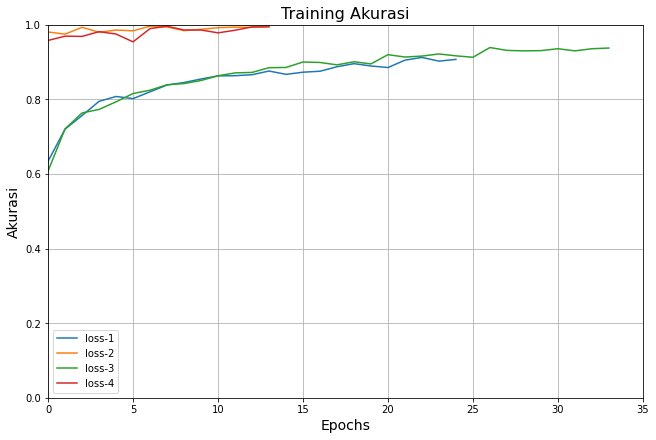

In [ ]:
vis_akurasi = visualisasi_fit('Training Akurasi', 'Akurasi', akurasi1, akurasi2, akurasi3, akurasi4)
vis_akurasi

In [ ]:
# P1 = 4
val_akurasi1 = [0.7458333373069763, 0.7458333373069763, 0.800000011920929, 0.7979166507720947, 0.8020833134651184, 0.8208333253860474, 0.8187500238418579, 0.8416666388511658, 0.84375, 0.8416666388511658, 0.8520833253860474, 0.8520833253860474, 0.856249988079071, 0.8374999761581421, 0.8416666388511658, 0.8104166388511658, 0.8020833134651184, 0.8645833134651184, 0.84375, 0.8791666626930237, 0.8583333492279053, 0.8687499761581421, 0.8354166746139526, 0.862500011920929, 0.8583333492279053]
# P2 = 5
val_akurasi2 = [0.987500011920929, 0.9895833134651184, 0.981249988079071, 0.9624999761581421, 0.987500011920929, 0.9833333492279053, 0.9916666746139526, 0.9708333611488342, 0.9770833253860474, 0.981249988079071, 0.9895833134651184, 0.987500011920929, 0.9708333611488342, 0.981249988079071]
# P3 = 2
val_akurasi3 = [0.6954314708709717, 0.710659921169281, 0.7614213228225708, 0.807106614112854, 0.789340078830719, 0.7918781638145447, 0.8197969794273376, 0.8147208094596863, 0.8426395654678345, 0.8274111747741699, 0.8350253701210022, 0.8527919054031372, 0.8375634551048279, 0.8604061007499695, 0.8401015400886536, 0.8604061007499695, 0.8553299307823181, 0.8223350048065186, 0.8680202960968018, 0.8604061007499695, 0.8781725764274597, 0.8324872851371765, 0.8654822111129761, 0.8451776504516602, 0.8781725764274597, 0.8730964660644531, 0.8705583810806274, 0.8426395654678345, 0.8807106614112854, 0.8705583810806274, 0.8324872851371765, 0.8527919054031372, 0.8553299307823181, 0.8730964660644531]
# P4 = 5
val_akurasi4 = [0.9465649127960205, 0.9541984796524048, 0.9541984796524048, 0.9872773289680481, 0.8193384408950806, 0.9694656729698181, 0.9796437621116638, 0.9796437621116638, 0.9770992398262024, 0.9541984796524048, 0.9440203309059143, 0.9669210910797119, 0.9491094350814819, 0.9643765687942505]

print(len(val_akurasi1))
print(len(val_akurasi2))
print(len(val_akurasi3))
print(len(val_akurasi4))


25
14
34
14


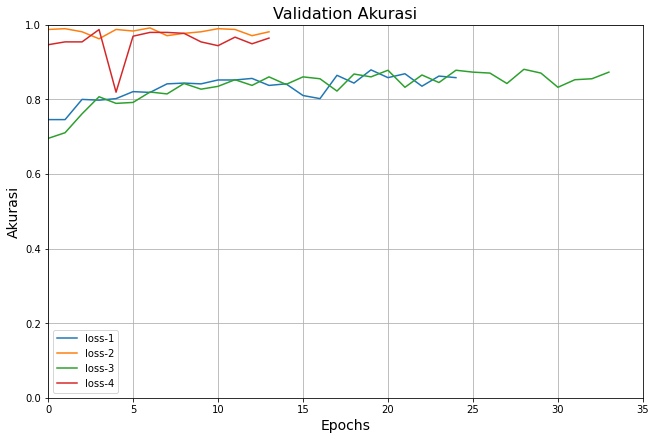

In [ ]:
vis_val_akurasi = visualisasi_fit('Validation Akurasi', 'Akurasi', val_akurasi1, val_akurasi2, val_akurasi3, val_akurasi4)
vis_val_akurasi

In [ ]:
acc = [92, 95, 91, 97]
prec = [90, 93, 91, 96]
rec = [97, 99, 94, 99]
f1 = [93, 96, 92, 97]
auc = [91, 94, 90, 96]
kategori = ['Uji-1', 'Uji-2', 'Uji-3', 'Uji-4']

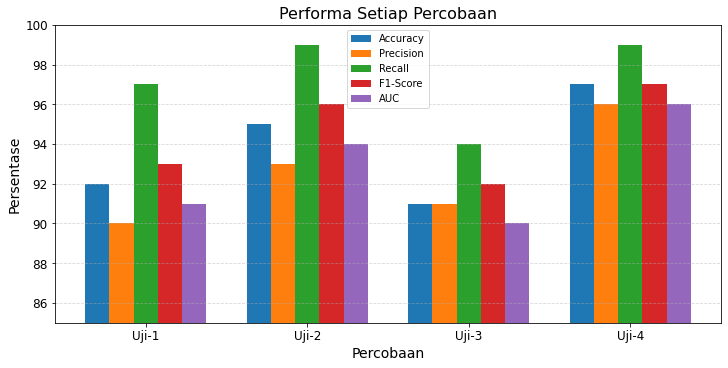

In [ ]:
x = np.arange(len(kategori))
width = 0.15

plt.subplots(constrained_layout=True, figsize=(10,5))
plt.bar(x - width - width, acc, width,  label='Accuracy')
plt.bar(x - width, prec, width,  label='Precision')
plt.bar(x, rec, width,  label='Recall')
plt.bar(x + width, f1, width,  label='F1-Score')
plt.bar(x + width + width, auc, width,  label='AUC')

plt.xticks(x, kategori, size=12)

plt.title('Performa Setiap Percobaan', size=16)
plt.ylabel('Persentase', size=14)
plt.xlabel('Percobaan', size=14)

plt.yticks(size=12)
plt.ylim((85, 100))
plt.grid(axis='y',
         linestyle='--',
         alpha=0.5)
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
import tensorflow
from tensorflow import keras
from keras.models import load_model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model

In [ ]:
vgg = VGG19(input_shape = (224, 224, 3), include_top=False, weights="imagenet")
vgg.trainable = False

80134624/80134624 [==============================] - 4s 0us/step


In [ ]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgg.layers[2].name

'block1_conv2'

In [ ]:
vgg.layers[2].__class__.__name__

'Conv2D'

In [ ]:
vgg.layers[2].get_weights()

[array([[[[ 0.14868847,  0.13240738, -0.0114684 , ...,  0.05765713,
           -0.01737906, -0.03008104],
          [ 0.02035563, -0.00413263,  0.08014648, ..., -0.01422818,
           -0.00175791,  0.00516016],
          [ 0.04415395,  0.0051028 ,  0.00406269, ..., -0.00690296,
            0.00362276,  0.00359026],
          ...,
          [ 0.00257509,  0.05460581,  0.01155106, ..., -0.00989089,
           -0.01210701, -0.00087919],
          [ 0.06229278,  0.01686585, -0.0073072 , ...,  0.01273249,
            0.02319529, -0.03375008],
          [ 0.1399587 ,  0.03320986, -0.01905973, ...,  0.03198308,
            0.01626255, -0.01768145]],
 
         [[ 0.18125165,  0.0314941 , -0.02872913, ...,  0.02796304,
            0.01104162, -0.02903034],
          [ 0.00161939, -0.00493985,  0.09890895, ..., -0.01830376,
            0.0165602 ,  0.00446571],
          [ 0.01161369, -0.00956485,  0.01124317, ..., -0.01453755,
            0.03195744,  0.00442639],
          ...,
          [-0

In [ ]:
vgg.layers[3].get_weights()

[]

In [ ]:
save_dir = '/content/drive/My Drive/Penelitian/save_models/percobaan_1/'

In [ ]:
model = load_model(save_dir+"model_4")
y_pred = model.predict(x_test)

19/19 [==============================] - 396s 21s/step


In [ ]:
y_pred

array([[9.9440491e-01, 5.5950638e-03],
       [9.1484076e-01, 8.5159160e-02],
       [9.9978304e-01, 2.1686802e-04],
       ...,
       [4.1148056e-07, 9.9999958e-01],
       [1.4971118e-07, 9.9999982e-01],
       [2.9286700e-06, 9.9999696e-01]], dtype=float32)

In [ ]:
y_pred[0]

array([0.9944049 , 0.00559506], dtype=float32)

In [ ]:
y_pred[-1]

array([2.9286700e-06, 9.9999696e-01], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
y_pred[0]

0

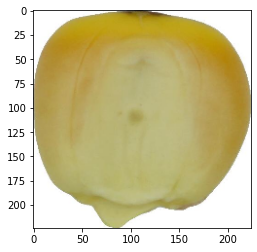

In [ ]:
plt.imshow(x_test[0])

In [ ]:
y_pred[-1]

1

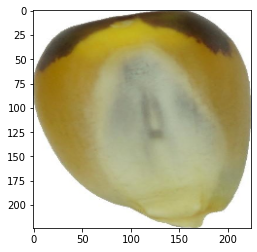

In [ ]:
plt.imshow(x_test[-1])

In [ ]:
def plot_image(i, predictions_label, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  # defining the plot value array
  if predictions_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f} ({})".format(kelas[predictions_label],
                                np.max(predictions_label),
                                kelas[true_label]),
                                color=color,
                                fontsize=16)

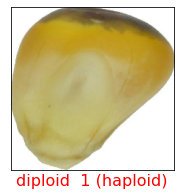

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plot_image(i, y_pred[i], y_test, x_test)
plt.show()

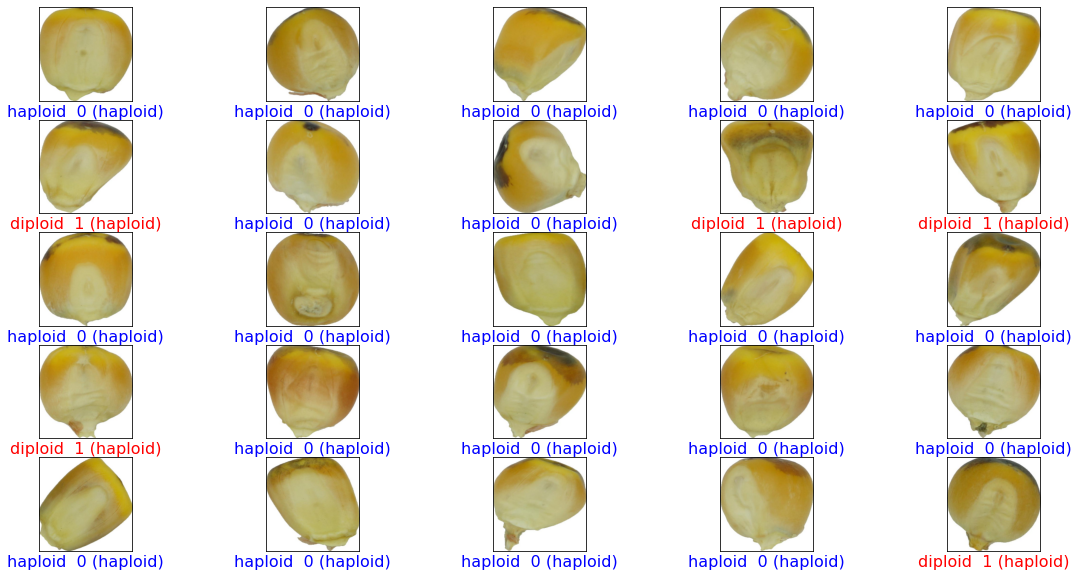

In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, y_pred[i], y_test, x_test)
plt.show()

In [ ]:
import random

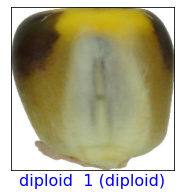

In [ ]:
i = random.randint(0,len(y_test))
plt.figure(figsize=(6,3))
plot_image(i, y_pred[i], y_test, x_test)
plt.show()